In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math
import torch.nn as nn


torch.set_default_dtype(torch.float64)


plt.style.use('default')
plt.rcParams['font.size'] = '14'

In [ ]:
from google.colab import files
csv = files.upload()

Saving Penn-GPA-and-HS-Data.csv to Penn-GPA-and-HS-Data.csv


In [ ]:
data = torch.from_numpy(
           np.genfromtxt (
               'Penn-GPA-and-HS-Data.csv',
               delimiter = ",",
               skip_header=1,
               dtype = float ) )

# The tensor "data" is a two dimensioanl table (a matrix). The first dimension
# (dimension 0) sweeps through students. The second dimension (dimension 1)
# sweeps through different pieces of data. We visualize this by printing the
# shape of the "data" tensor
print(f"\nNumber of students: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]}\n")


Number of students: 600
Number of variables: 5



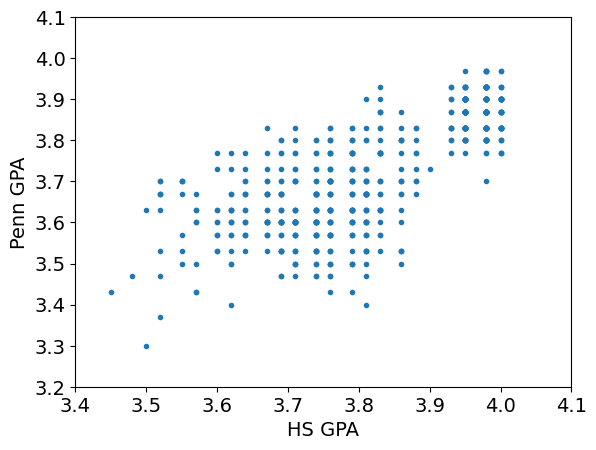

In [ ]:
hs_gpa = data[:,1]
sat_scores = data[:,2]
penn_gpa = data[:,4]

plt.plot(hs_gpa, penn_gpa, ".")
plt.xlabel("HS GPA")
plt.ylabel("Penn GPA")

plt.xlim([3.4, 4.1])
plt.ylim([3.2, 4.1])

plt.savefig("HSGPAvsPennGPA.pdf")


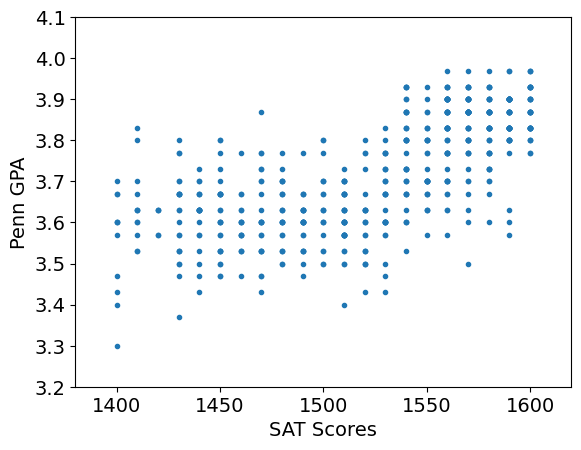

In [ ]:

plt.plot(sat_scores, penn_gpa, ".")
plt.xlabel("SAT Scores")
plt.ylabel("Penn GPA")
plt.xlim([1380, 1620])
plt.ylim([3.2, 4.1])
plt.savefig("SATScoresvsPennGPA.pdf")

In [ ]:
numerator = torch.dot(hs_gpa, penn_gpa)
denominator = torch.dot(hs_gpa, hs_gpa)
alpha = numerator/denominator
alpha

tensor(0.9753)

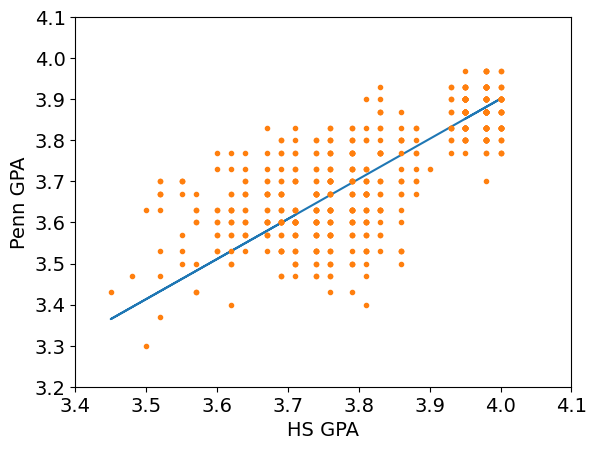

In [ ]:
y = alpha * hs_gpa
plt.plot(hs_gpa, y)
plt.plot(hs_gpa, penn_gpa, ".")

plt.xlabel("HS GPA")
plt.ylabel("Penn GPA")

plt.xlim([3.4, 4.1])
plt.ylim([3.2, 4.1])

plt.savefig("linear_model_HSGPA.pdf")

In [ ]:
diff = penn_gpa - alpha * hs_gpa
rmse = math.sqrt(torch.dot(diff, diff).item()/penn_gpa.size(dim=0))
rmse

0.09352524560916761

In [ ]:
# The value of RMSE is 0.09352524560916761, which seems to be relatively accurate, thus
# from what we can observe from the graph, the range of the GPA values is large (3.3 to 4) which implies that the value of RMSE which is close to 0.1,
# is not very accurate

In [ ]:
hs_sat_input = torch.stack((hs_gpa, sat_scores),1)

tensor([[   3.9500, 1570.0000],
        [   4.0000, 1580.0000],
        [   3.6900, 1560.0000],
        ...,
        [   3.7900, 1550.0000],
        [   3.7100, 1480.0000],
        [   3.7100, 1470.0000]])

In [ ]:
w = torch.mm(torch.linalg.inv(torch.mm(hs_sat_input.T, hs_sat_input)), torch.mm(hs_sat_input.T,penn_gpa.reshape(600,1)))
w


tensor([[0.6332],
        [0.0009]])

In [ ]:
diff = (penn_gpa - torch.mm(w.T, hs_sat_input.T)).resize(600)
rmse = math.sqrt(torch.dot(diff, diff).item()/penn_gpa.size(dim=0))
rmse

0.08760880007917757